In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
from shapely.geometry import Point
import shapefile as shp

In [2]:
#importing dataset
crime1 = pd.read_excel('crime_against_women_(State-UT-wise)_2019-2021.xlsx')

In [3]:
crime1.head()

,S.No,State/UT,Name,2019,2020,2021,midPopulation,RateofCrimeAgainstWomen,ChargesSheetingRate
0,1,State,Andhra Pradesh,17746,17089,17752,264.2,67.2,93.5
1,2,State,Arunachal Pradesh,317,281,366,7.5,49.1,77.6
2,3,State,Assam,30025,26352,29046,172.6,168.3,52.9
3,4,State,Bihar,18587,15359,17950,593.7,30.2,69.4
4,5,State,Chhattisgarh,7689,7385,7344,147.6,49.8,88.5


Performing data cleaning and manipulation:

In [4]:
#getting no of rows and columns
crime1.shape

(37, 9)

In [5]:
# Checking datatypes of columns to spot inconsistency
# Checking no of rows and columns
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S.No                     37 non-null     int64  
 1   State/UT                 37 non-null     object 
 2   Name                     37 non-null     object 
 3   2019                     37 non-null     int64  
 4   2020                     37 non-null     int64  
 5   2021                     37 non-null     int64  
 6   midPopulation            37 non-null     float64
 7   RateofCrimeAgainstWomen  37 non-null     float64
 8   ChargesSheetingRate      37 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.7+ KB


In [6]:
#Checking for null values in each column
crime1.isna().sum()

S.No                       0
State/UT                   0
Name                       0
2019                       0
2020                       0
2021                       0
midPopulation              0
RateofCrimeAgainstWomen    0
ChargesSheetingRate        0
dtype: int64

In [9]:
#Checking for duplicate values in each column
crime1.duplicated().sum()

0

In [ ]:
#Checking names of each column
crime1.columns

Observations after performing data cleaning and manipulations:
1. There are no null values in any columns.
2. Data frame has 37 rows and 9 columns.
5. There are no null values in any columns.

In [48]:
# 10 states with most crimes against women in 2019:
#setting index with set_index()
crimeinStates = crime1[['Name',2019]].sort_values(by=[2019],ascending=False).head(10)
crimeinStates = crimeinStates.set_index('Name')
crimeinStates

,2019
Name,
Uttar Pradesh,59853
Rajasthan,41550
Maharashtra,37144
Assam,30025
West Bengal,29859
Madhya Pradesh,27560
Odisha,23183
Bihar,18587
Telangana,18394


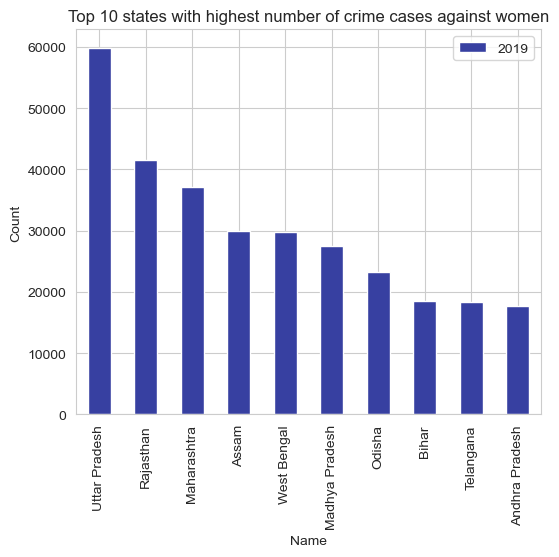

In [49]:
# creating the bar plot
crimeinStates.plot(kind='bar',color='#3740A1',figsize=(6,5),ylabel='Count',title='Top 10 states with highest number of crime cases against women')
plt.show()

In [50]:
# 10 states with most dcrimes against women in 2020:
#setting index with set_index()
crimeinStates = crime1[['Name',2020]].sort_values(by=[2020],ascending=False).head(10)
crimeinStates = crimeinStates.set_index('Name')
crimeinStates

,2020
Name,
Uttar Pradesh,49385
West Bengal,36439
Rajasthan,34535
Maharashtra,31954
Assam,26352
Madhya Pradesh,25640
Odisha,25489
Telangana,17791
Andhra Pradesh,17089


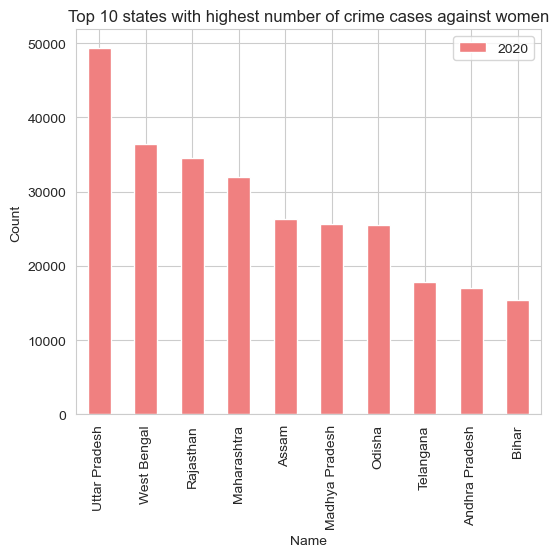

In [51]:
# creating the bar plot
crimeinStates.plot(kind='bar',color='lightcoral',figsize=(6,5),ylabel='Count',title='Top 10 states with highest number of crime cases against women')
plt.show()

In [52]:
# 10 states with most dcrimes against women in 2021:
#setting index with set_index()
crimeinStates = crime1[['Name',2021]].sort_values(by=[2021],ascending=False).head(10)
crimeinStates = crimeinStates.set_index('Name')
crimeinStates

,2021
Name,
Uttar Pradesh,56083
Rajasthan,40738
Maharashtra,39526
West Bengal,35884
Odisha,31352
Madhya Pradesh,30673
Assam,29046
Telangana,20865
Bihar,17950


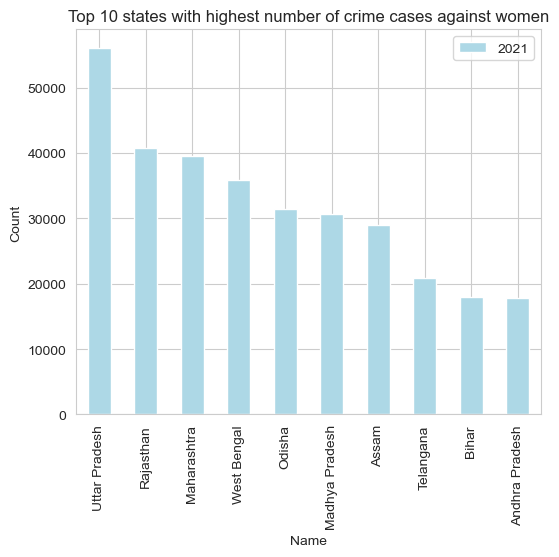

In [47]:
# creating the bar plot
crimeinStates.plot(kind='bar',color='lightblue',figsize=(6,5),ylabel='Count',title='Top 10 states with highest number of crime cases against women')
plt.show()

Observations after analysis:
1. In 2019, Uttar Pradesh,Rajastan and Maharashtra had the highest number of crimes against women.
2. In 2020, Uttar Pradesh,West Bengal and Rajastan had the highest number of crimes against women.
3. In 2021, Uttar Pradesh,Rajastan and Maharashtra had the highest number of crimes against women.
4. In 3 years, Uttar Pradesh, Rajastan and Maharashtra have the highest record of crime against women. So these places need strict imposal of laws and faster response against crime.

In [53]:
# 10 states with least crimes against children in 2019:
#setting index with set_index()
lowestCrime = crime1[['Name',2019]].sort_values(by=[2019],ascending=True).head(10)
lowestCrime = lowestCrime.set_index('Name')
lowestCrime

,2019
Name,
Ladakh,0
Lakshadweep,38
Nagaland,43
Daman and Diu,82
Dadra and Nagar Haveli,82
Puducherry,95
Sikkim,125
Andaman and Nicobar Islands,135
Mizoram,170


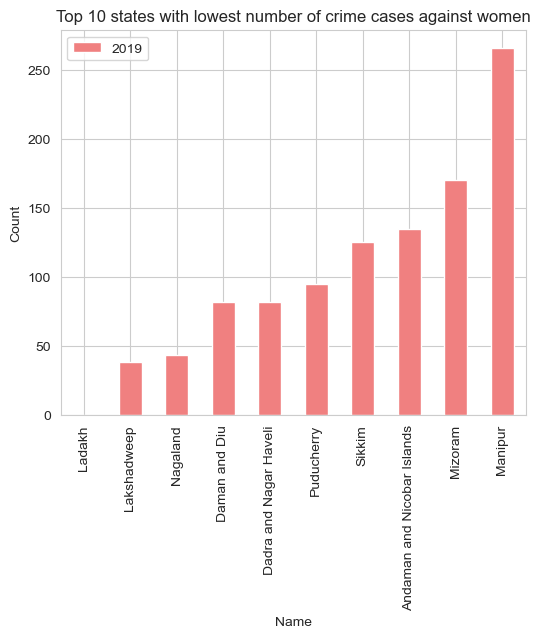

In [54]:
# creating the bar plot
lowestCrime.plot(kind='bar',color='lightcoral',figsize=(6,5),ylabel='Count',title='Top 10 states with lowest number of crime cases against women')
plt.show()

In [56]:
# 10 states with least crimes against children in 2020:
#setting index with set_index()
lowestCrime = crime1[['Name',2020]].sort_values(by=[2020],ascending=True).head(10)
lowestCrime = lowestCrime.set_index('Name')
lowestCrime

,2020
Name,
Ladakh,9
Lakshadweep,15
Nagaland,39
Dadra and Nagar Haveli,61
Daman and Diu,61
Puducherry,113
Sikkim,140
Andaman and Nicobar Islands,143
Mizoram,172


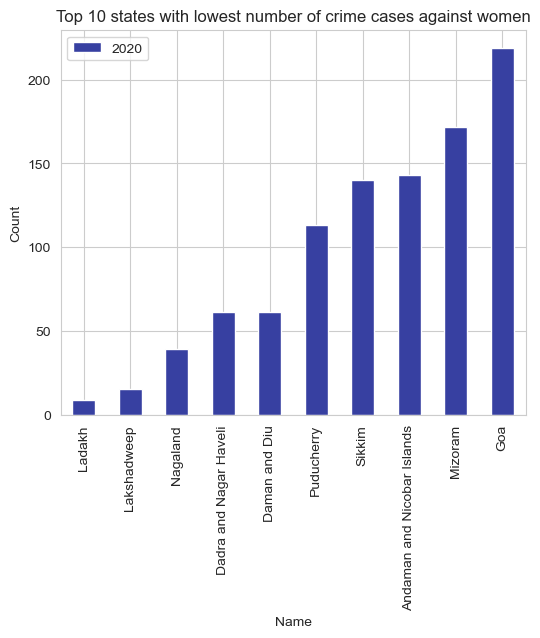

In [57]:
# creating the bar plot
lowestCrime.plot(kind='bar',color='#3740A1',figsize=(6,5),ylabel='Count',title='Top 10 states with lowest number of crime cases against women')
plt.show()

In [58]:
# 10 states with least crimes against children in 2021:
#setting index with set_index()
lowestCrime = crime1[['Name',2021]].sort_values(by=[2021],ascending=True).head(10)
lowestCrime = lowestCrime.set_index('Name')
lowestCrime

,2021
Name,
Lakshadweep,9
Ladakh,18
Nagaland,54
Daman and Diu,99
Dadra and Nagar Haveli,99
Sikkim,130
Puducherry,153
Andaman and Nicobar Islands,169
Mizoram,176


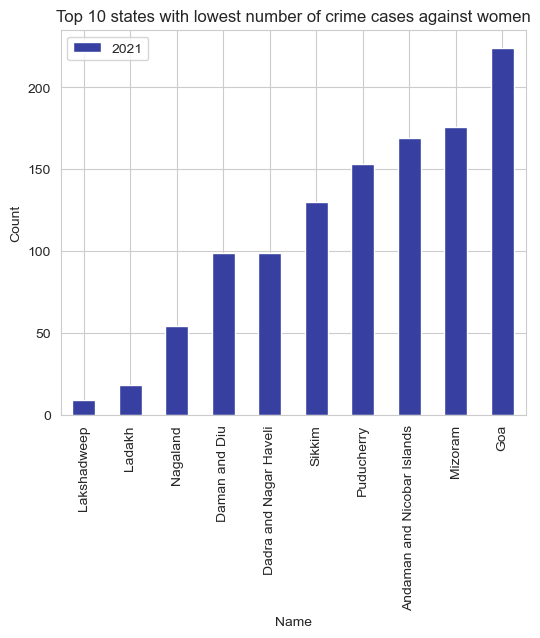

In [59]:
# creating the bar plot
lowestCrime.plot(kind='bar',color='#3740A1',figsize=(6,5),ylabel='Count',title='Top 10 states with lowest number of crime cases against women')
plt.show()

Observations after analysis:
1. In 2019 2020,2021 Ladakh, Lakshadweep and Nagaland had the lowest number of crimes against women.
4. This can be due to the fact that population in these states is low compared to other states. Nevertheless, crimes did happen and laws should be strict.

In [60]:
df = crime1.groupby('State/UT')[[2019,2020,2021]].sum()
df = df.sort_values(by =['State/UT'],ascending = False).head(10)
df

,2019,2020,2021
State/UT,,,
UT,17411,14201,19104
State,387997,357363,409273


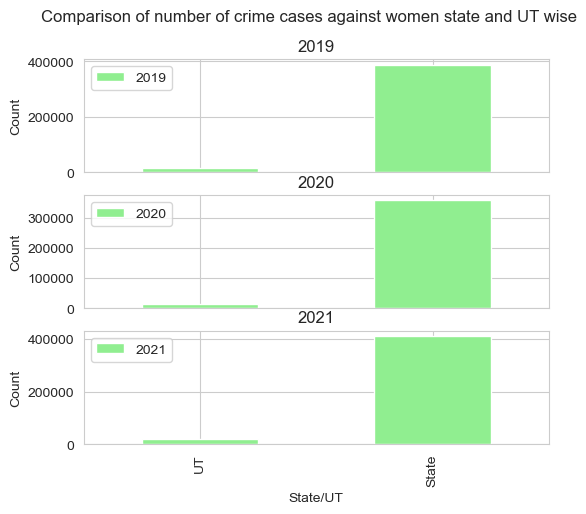

In [61]:
# creating the bar plot
df.plot(kind='bar',subplots = True,color='lightgreen',figsize=(6,5),ylabel='Count',title='Comparison of number of crime cases against women state and UT wise')
plt.show()

Observations:
1. Number of crimes in States is way more than that in UT. 
2. Quite expected resulted since the population of UTs is way less than that of States.

In [62]:
#grouping data by year
df = crime1.groupby('Name')[[2019,2020,2021]].sum()
df.head(10)

,2019,2020,2021
Name,,,
Andaman and Nicobar Islands,135,143,169
Andhra Pradesh,17746,17089,17752
Arunachal Pradesh,317,281,366
Assam,30025,26352,29046
Bihar,18587,15359,17950
Chandigarh,515,301,343
Chhattisgarh,7689,7385,7344
Dadra and Nagar Haveli,82,61,99
Daman and Diu,82,61,99


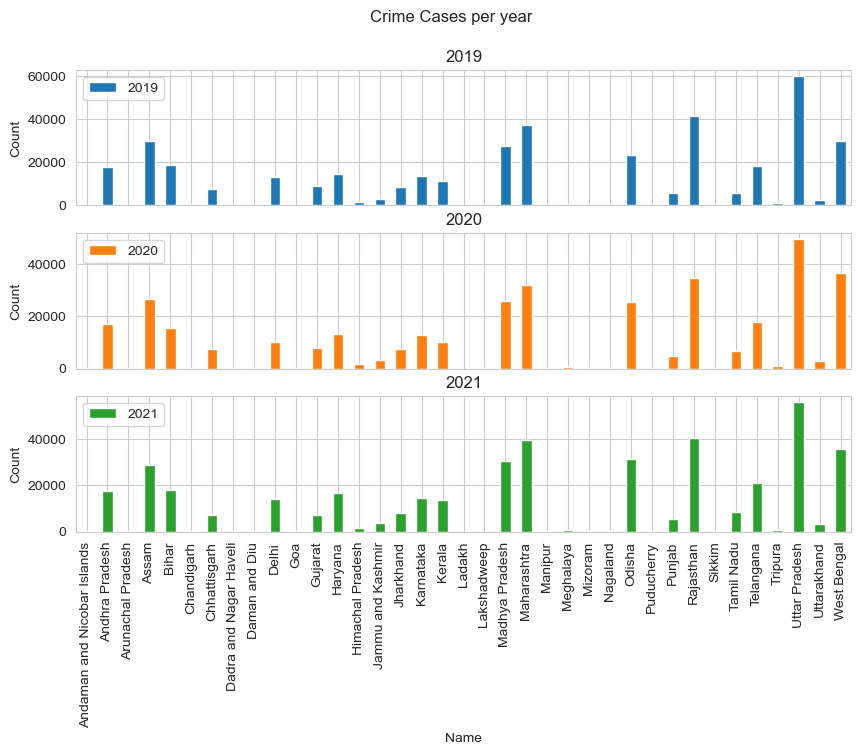

In [63]:
#creating bar plot 
df.plot(kind='bar',ylabel = 'Count',subplots=True,figsize=(10,6),title=('Crime Cases per year'))
plt.show()

Observations:
1. Year by year comparison of crimes in all states and UTs. This way we can directly check the rate of crime in each state/UT in each year.
2. We can easily identify that Ladakh had no crimes against women from 2019 - 2021 whereas Uttar Pradesh had the highest rate of crime in these 3 years.

In [64]:
#top 10 highest rate of crime against women 
rateofCrime = crime1[['Name','RateofCrimeAgainstWomen']].sort_values(by=['RateofCrimeAgainstWomen'],ascending=False).head(10)
rateofCrime = rateofCrime.set_index('Name')
rateofCrime

,RateofCrimeAgainstWomen
Name,
Assam,168.3
Delhi,147.6
Odisha,137.8
Haryana,119.7
Telangana,111.2
Rajasthan,105.4
Andaman and Nicobar Islands,89.4
Madhya Pradesh,74.7
West Bengal,74.6


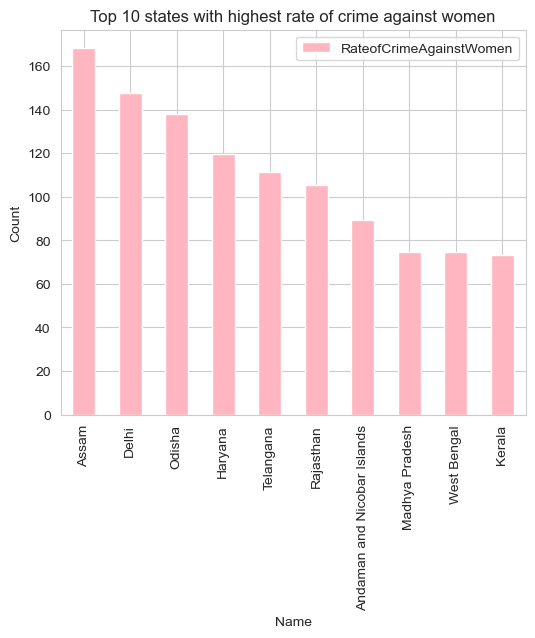

In [66]:
#creating bar plot
rateofCrime.plot(kind='bar',ylabel = 'Count',color='lightpink',figsize=(6,5),title=('Top 10 states with highest rate of crime against women'))
plt.show()

In [67]:
#top 10 lowest rate of crime against women 
rateofCrime = crime1[['Name','RateofCrimeAgainstWomen']].sort_values(by=['RateofCrimeAgainstWomen'],ascending=True).head(10)
rateofCrime = rateofCrime.set_index('Name')
rateofCrime

,RateofCrimeAgainstWomen
Name,
Nagaland,5.1
Ladakh,13.8
Puducherry,18.5
Manipur,19.1
Gujarat,22.1
Tamil Nadu,22.2
Daman and Diu,25.3
Dadra and Nagar Haveli,25.3
Lakshadweep,27.3


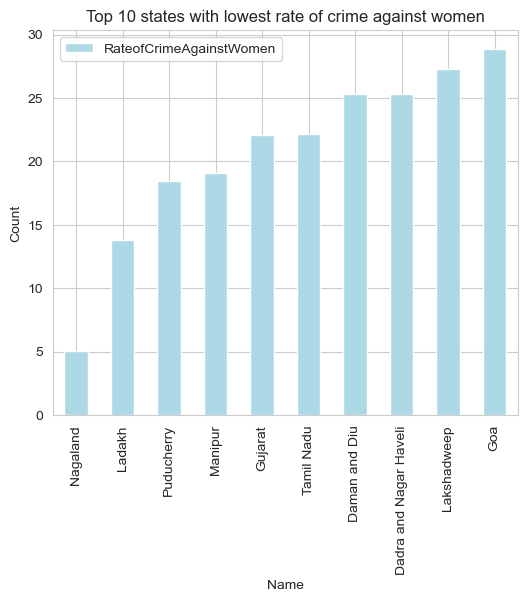

In [68]:
#creating bar plot
rateofCrime.plot(kind='bar',ylabel = 'Count',color='lightblue',figsize=(6,5),title=('Top 10 states with lowest rate of crime against women'))
plt.show()

Observations:
1. Rate of crime is calculated in percentage against population of the state/UT. Hence,the states recording highes/lowest number
of crimes in a year is different against the states recording highest/lowest rate of crime.
2. Assam and Delhi has the highest rate of crime while Nagaland and Ladakh ha sthe lowest rate of crime.

In [73]:
#top 10 highest charge sheeting rate
chargesheetingrate = crime1[['Name','ChargesSheetingRate']].sort_values(by=['ChargesSheetingRate'],ascending=False).head(10)
chargesheetingrate = chargesheetingrate.set_index('Name')
chargesheetingrate

,ChargesSheetingRate
Name,
Sikkim,98.3
Puducherry,97.6
Andaman and Nicobar Islands,97.1
Mizoram,94.9
Kerala,94.6
West Bengal,93.7
Andhra Pradesh,93.5
Gujarat,93.3
Chhattisgarh,88.5


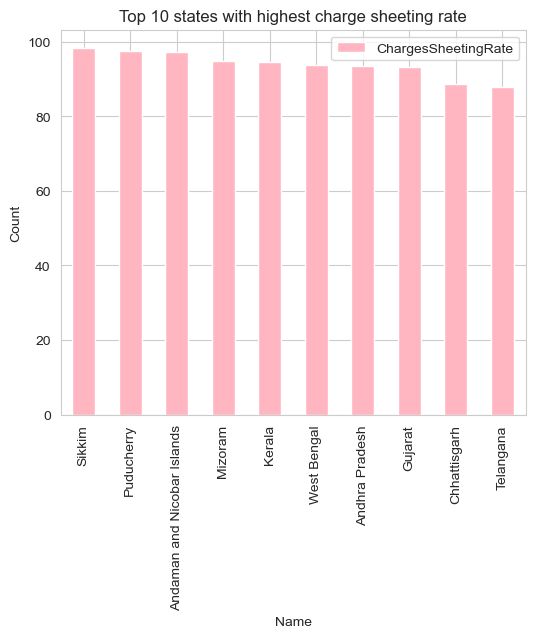

In [75]:
#creating bar plot
chargesheetingrate.plot(kind='bar',ylabel = 'Count',color='lightpink',figsize=(6,5),title=('Top 10 states with highest charge sheeting rate'))
plt.show()

In [78]:
#top 10 lowest charge sheeting rate
chargesheetingrate1 = crime1[['Name','ChargesSheetingRate']].sort_values(by=['ChargesSheetingRate'],ascending=True).head(10)
chargesheetingrate1 = chargesheetingrate1.set_index('Name')
chargesheetingrate1

,ChargesSheetingRate
Name,
Manipur,48.4
Chandigarh,51.0
Assam,52.9
Rajasthan,54.5
Haryana,57.1
Bihar,69.4
Delhi,71.2
Jammu and Kashmir,72.5
Daman and Diu,74.0


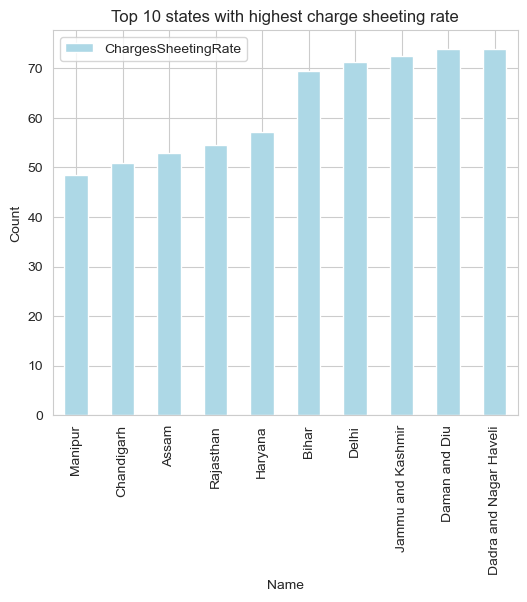

In [79]:
#creating bar plot
chargesheetingrate1.plot(kind='bar',ylabel = 'Count',color='lightblue',figsize=(6,5),title=('Top 10 states with highest charge sheeting rate'))
plt.show()

Observations after analysis:
1. As per section 174 of the Code of Criminal Procedure, 1973, a report which is made by the police officers after completion of the final investigation is known as the chargesheet. The report is related to the crime which is held against the plaintiff by the accused in order to collect the evidence.
2. So more the rate of charge sheeting, better is the chance for the victims to get justice. It also means victims are getting their cases listened in court.
3. Here, charge shaeeting rate is calculated in percentage agaisnt the rate of crime value. 
4. Sikkim, Puducherry and Andaman and Nicobar Islands have the highest charge sheeting rate.
5. Manipur, Chandigarh an Assam have the lowest charge sheeting rate.
6. So we have to dig dipper into the states having low charge sheeting rate as to why out of so many crimes happening, only a small percentage is getting recognised by law. It can be due to lack of evidence / foul play / corruption. 

In [41]:
#importing geodataframe of India
sb.set_style('whitegrid')
india = r'D:\Maps_with_python-master\india-polygon.shp'
map_df = gpd.read_file(india) 
map_df_copy = gpd.read_file(india)
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<Axes: >

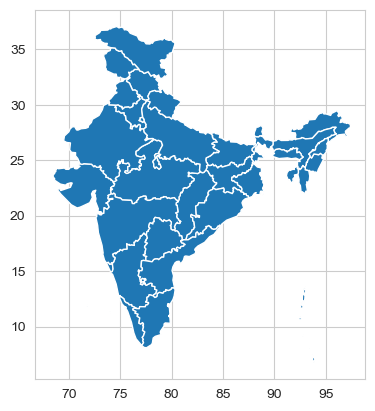

In [42]:
map_df.plot()

In [80]:
#Merging the data
crime_df = crime1
merged = map_df.set_index('st_nm').join(crime_df.set_index('Name'))
merged.head()

,id,geometry,S.No,State/UT,2019,2020,2021,midPopulation,RateofCrimeAgainstWomen,ChargesSheetingRate
st_nm,,,,,,,,,,
Andaman and Nicobar Islands,NaN,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",29,UT,135,143,169,1.9,89.4,97.1
Arunachal Pradesh,NaN,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",2,State,317,281,366,7.5,49.1,77.6
Assam,NaN,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",3,State,30025,26352,29046,172.6,168.3,52.9
Bihar,NaN,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",4,State,18587,15359,17950,593.7,30.2,69.4
Chandigarh,NaN,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",30,UT,515,301,343,5.6,61.7,51.0


<Axes: title={'center': 'Rate of crime against women in India state-wise'}>

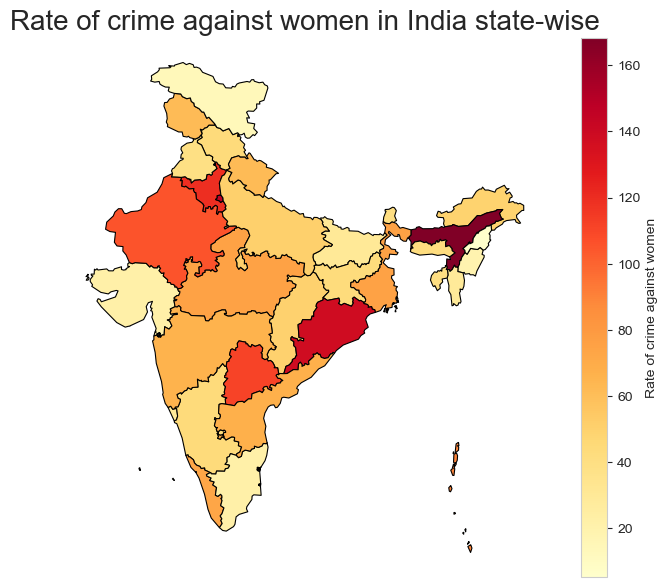

In [71]:
#Create figure and axes for Matplotlib and set the title
# linewidth = outline of states, edgecolour = colour of state outline-> 0=black,1 = white
fig, ax = plt.subplots(1, figsize=(9, 7))
ax.axis('off')
ax.set_title('Rate of crime against women in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='RateofCrimeAgainstWomen',cmap='YlOrRd', linewidth=0.8, ax=ax,edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Rate of crime against women"})

<Axes: title={'center': 'Rate of charge sheeting in India state-wise'}>

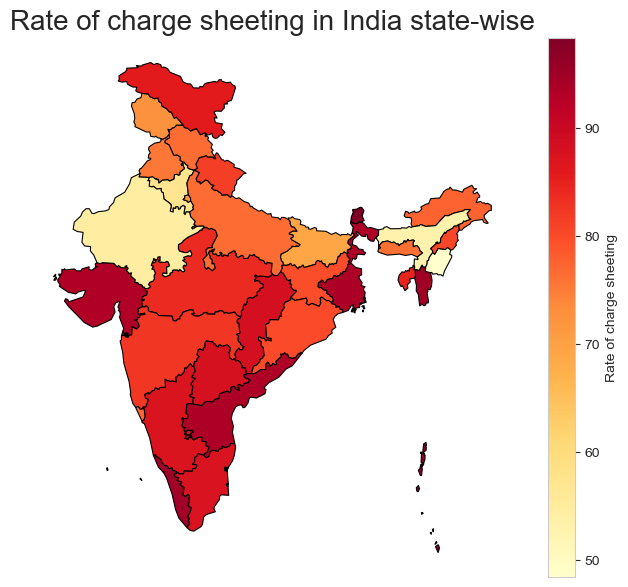

In [72]:
#Create figure and axes for Matplotlib and set the title
# linewidth = outline of states, edgecolour = colour of state outline-> 0=black,1 = white
fig, ax = plt.subplots(1, figsize=(9, 7))
ax.axis('off')
ax.set_title('Rate of charge sheeting in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})

# Plot the figure
merged.plot(column='ChargesSheetingRate',cmap='YlOrRd', linewidth=0.8, ax=ax,edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Rate of charge sheeting"})